In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score,confusion_matrix, classification_report, roc_curve, auc,f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.exceptions import FitFailedWarning
from xgboost import XGBClassifier

Implementing Class

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, classification_report, roc_curve, auc
)
import matplotlib.pyplot as plt

class XGBboost:

    def __init__(self):
        self.XG_classifier = XGBClassifier(
            n_estimators=200,          
            learning_rate=0.06,         
            max_leaf_nodes=8,          
            max_depth=3,                
            min_samples_split=2,        
            min_samples_leaf=1,        
            subsample=1.0,   
            max_features=None,          
            random_state=42
        )

    def fit(self, X, y):
        self.XG_classifier.fit(X, y)

    def predict(self, X): 
        return self.XG_classifier.predict(X)
    
    def print_stats(self, y_actual, y_pred):
        acc = accuracy_score(y_actual, y_pred)
        f1 = f1_score(y_actual, y_pred)
        prec = precision_score(y_actual, y_pred)
        rec = recall_score(y_actual, y_pred)
        print("=== Model Performance ===")
        print(f"Accuracy:  {acc:.4f}")
        print(f"F1 Score:  {f1:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall:    {rec:.4f}")

    def plot_confusion_matrix(self, y_actual, y_pred):
        cm = confusion_matrix(y_actual, y_pred)
        plt.figure(figsize=(5,4))
        plt.imshow(cm, cmap='Blues')
        plt.title("Confusion Matrix")
        plt.colorbar()
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                plt.text(j, i, cm[i, j], ha='center', va='center', color='black')
        plt.show()

    def plot_roc_curve(self, X_test, y_test):
        if len(set(y_test)) == 2:  # only valid for binary classification
            y_prob = self.XG_classifier.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            roc_auc = auc(fpr, tpr)
            plt.figure(figsize=(6, 4))
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.title("ROC Curve")
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.legend()
            plt.show()
        else:
            print("ROC curve only supported for binary classification.")


In [12]:
def run_test():

    df_bots = pd.read_csv("../parsed_data/bots.csv")
    df_bots["bot"] = 1
    df_bots
    df_hum = pd.read_csv("../parsed_data/human.csv")
    df_hum["bot"] = 0
    df_hum
    df_merged = pd.concat([df_bots, df_hum], ignore_index=True, sort=False)
    df_bots_nomv = pd.read_csv("../parsed_data/bots_no_mv_req.csv")
    df_bots_nomv["bot"] = 1
    df_bots_nomv
    df_hum_nomv = pd.read_csv("../parsed_data/human_no_mv_req.csv")
    df_hum_nomv["bot"] = 0
    df_hum_nomv
    df_merged_nomv = pd.concat([df_bots_nomv, df_hum_nomv], ignore_index=True, sort=False)
    df_merged_nomv
    X = df_merged.iloc[:, 1:-1].values
    Y = df_merged.iloc[:, -1].values
    X_nomv = df_merged_nomv.iloc[:, 1:-1].values
    Y_nomv = df_merged_nomv.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    X_train_nomv, X_test_nomv, y_train_nomv, y_test_nomv = train_test_split(X_nomv, Y_nomv, test_size=0.2, random_state=42)
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    scaler_nomv=StandardScaler()
    X_train_nomv=scaler_nomv.fit_transform(X_train_nomv)
    X_test_nomv=scaler_nomv.transform(X_test_nomv)




    XGB_classifier=XGBboost()
    XGB_classifier.fit(X_train,y_train)

    y_pred=XGB_classifier.predict(X_test)
    XGB_classifier.print_stats(y_test,y_pred)

    XGB_classifier.plot_confusion_matrix(y_test,y_pred)
    XGB_classifier.plot_roc_curve(X_test,y_test)


    XGB_classifier_nomv=XGBboost()
    XGB_classifier_nomv.fit(X_train_nomv,y_train_nomv)

    y_pred_nomv=XGB_classifier_nomv.predict(X_test_nomv)
    XGB_classifier_nomv.print_stats(y_test_nomv,y_pred_nomv)

    XGB_classifier_nomv.plot_confusion_matrix(y_test_nomv,y_pred_nomv)
    XGB_classifier_nomv.plot_roc_curve(X_test_nomv,y_test_nomv)

c:\Users\sudin\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:29:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "max_leaf_nodes", "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== Model Performance ===
Accuracy:  0.8896
F1 Score:  0.8902
Precision: 0.8488
Recall:    0.9359


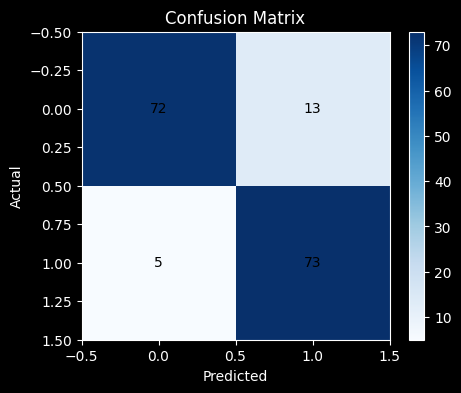

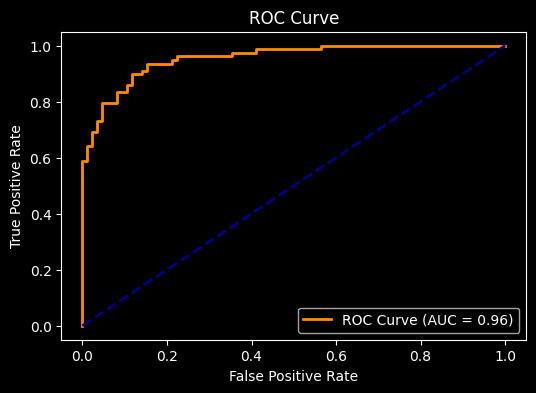

c:\Users\sudin\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:29:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "max_leaf_nodes", "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== Model Performance ===
Accuracy:  0.9264
F1 Score:  0.9231
Precision: 0.9231
Recall:    0.9231


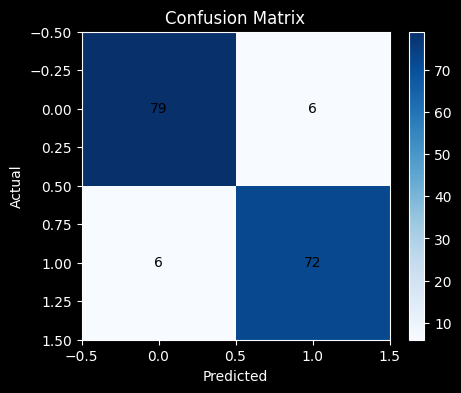

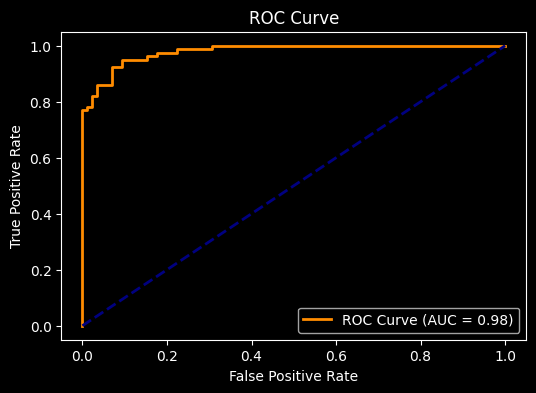

In [ ]:
# run_test()